## Importing Libraries

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neural_network import MLPClassifier

from pyGPGO.covfunc import squaredExponential
from pyGPGO.surrogates.GaussianProcess import GaussianProcess
from pyGPGO.surrogates.RandomForest import RandomForest
from pyGPGO.GPGO import GPGO
from pyGPGO.acquisition import Acquisition

from warnings import filterwarnings

import pandas as pd

import numpy as np

from statistics import mean 

import matplotlib.pyplot as plt
%matplotlib inline

import math

import random

import seaborn as sns

## Function

In [18]:
def load_data(path, control):
    df = pd.read_csv(path)
    
    if control:
        print_correlation_matrix(df)
    
    df = df.values.copy()
    
    data =  df[:, 0:-1].astype(np.float32) 

    label = df[:, -1]
    label = label - 1
    
    
    
    scaler = StandardScaler()
    scaler.fit(data)
    data = scaler.transform(data)
    
    return data, label
    
    
def get_distribution(value):
    
    value, counts = np.unique(value, return_counts=True)
    distribution = dict(zip(value, counts))
    
    label = ['No Fertility', 'Fertility']
    values = list(distribution.values())
    fig1, ax1 = plt.subplots()
    
    ax1.pie( values, labels = label, explode = (0, 0.2), autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')
    plt.show()

def compute_accuracy_neural_network_sklearn(learning_rate, momentum, first_layer = 4, second_layer = 2):
    
    learning_rate_done.append(learning_rate)
    momentum_done.append(momentum)
    
        
    kfold = StratifiedKFold(n_splits=10, shuffle=False)
    
    first_layer = int(first_layer)
    second_layer = int(second_layer)
    
    print("{:<21}{:>5}".format("TRY LEARNING RATE: ", round(learning_rate, 5)))
    print("{:<21}{:>5}".format("TRY MOMENTUM:", round(momentum, 5)))
    print("{:<21}{:>5}".format("TRY FIRST NEURONS: ", int(first_layer)))
    print("{:<21}{:>5}".format("TRY SECOND NEURONS: ", int(second_layer)))
    
    data, label = load_data('./php9pgo5r.csv', 0)
    
    cvscores = []
    
    precision_0 = list()
    recall_0 = list()
    
    precision_1 = list()
    recall_1 = list()
    
    for train, test in kfold.split(data, label):
        
        net = MLPClassifier(hidden_layer_sizes=(int(first_layer) , int(second_layer)), solver='sgd', batch_size = 35,
                        learning_rate_init = learning_rate, momentum = momentum)
        
        net.fit(data[train], label[train])
        
        y_pred = net.predict(data[test])
        
        scores = accuracy_score(label[test], y_pred)
        
        precision_0.append(classification_report(label[test], y_pred, output_dict = True)['0.0']['precision'])
        recall_0.append(classification_report(label[test], y_pred, output_dict = True)['0.0']['recall'])
        
        precision_1.append(classification_report(label[test], y_pred, output_dict = True)['1.0']['precision'])
        recall_1.append(classification_report(label[test], y_pred, output_dict = True)['1.0']['recall'])
        
        cvscores.append(scores)
        
    print("{:<21}{:>5}".format("ACCURACY OBTAIN: ", round(np.mean(cvscores), 5)))
    print("{:<21}{:>5}".format("PRECISION CLASS 0: ", round(np.mean(precision_0), 5)))
    print("{:<21}{:>5}".format("RECALL CLASS 0: ", round(np.mean(recall_0), 5)))
    print("{:<21}{:>5}".format("PRECISION CLASS 1: ", round(np.mean(precision_1), 5)))
    print("{:<21}{:>5}".format("RECALL CLASS 1: ", round(np.mean(recall_1), 5)))
    print("")
    
    if len(best_seen) == 0:
        best_seen.append(np.mean(cvscores))
    else:
        if np.mean(cvscores) > max(best_seen):
            best_seen.append(np.mean(cvscores))
        else:
            best_seen.append(best_seen[-1])
            
    seen.append(np.mean(cvscores))
    
    return (np.mean(cvscores))


def print_correlation_matrix(dataset):
    corr = dataset.corr()
    plt.subplots(figsize=(15, 15))
    plot = sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values,
                      linewidths=.3, vmin=-1, vmax=1, annot=True)

## Main

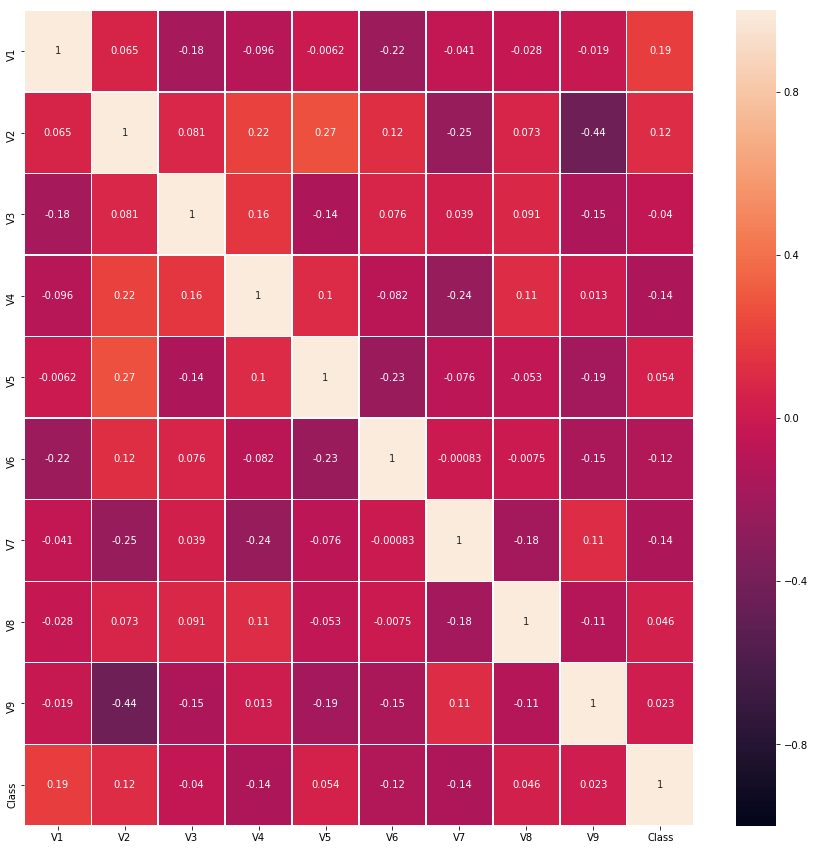

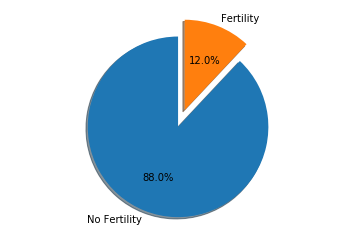

In [19]:
data, label = load_data('./php9pgo5r.csv', 1)
get_distribution(label)
filterwarnings('ignore')

## STEP 1

### Sklearn

In [20]:
param = {'learning_rate': ('cont', [0.001,0.1]), 'momentum': ('cont', [0.1, 0.9]),  }
sexp = squaredExponential()
 sur_model = GaussianProcess(sexp)
acq_one = Acquisition(mode="ExpectedImprovement")
acq_two = Acquisition(mode="ProbabilityImprovement")

In [21]:
best_seen = list()
learning_rate_done = list()
momentum_done = list()
seen = list()

In [22]:
bo_one = GPGO(sur_model, acq_one, compute_accuracy_neural_network_sklearn, param, n_jobs=1)
bo_one._firstRun(5)    

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
TRY LEARNING RATE:   0.05055
TRY MOMENTUM:        0.4733
TRY FIRST NEURONS:       4
TRY SECOND NEURONS:      2
ACCURACY OBTAIN:     0.84303
PRECISION CLASS 0:   0.88306
RECALL CLASS 0:      0.94306
PRECISION CLASS 1:     0.1
RECALL CLASS 1:        0.1

TRY LEARNING RATE:   0.04753
TRY MOMENTUM:        0.87801
TRY FIRST NEURONS:       4
TRY SECOND NEURONS:      2
ACCURACY OBTAIN:     0.80414
PRECISION CLASS 0:   0.8921
RECALL CLASS 0:      0.8875
PRECISION CLASS 1:   0.075
RECALL CLASS 1:        0.2

TRY LEARNING RATE:   0.08336
TRY MOMENTUM:        0.1906
TRY FIRST NEURONS:       4
TRY SECOND NEURONS:      2
ACCURACY OBTAIN:     0.88141
PRECISION CLASS 0:   0.88848
RECALL CLASS 0:      0.98889
PRECISION CLASS 1:    0.05
RECALL CLASS 1:       0.05

TRY LEARNING RATE:   0.01668
TRY MOMENTUM:        0.46315
TRY FIRST NEURONS:       4
TRY SECOND NEURONS:      2
ACCURACY OBTAIN:     0.87232
PRECISION CLASS 0:   0.8796
RECALL CLASS 0:

In [23]:
print(best_seen)
best_seen_b2 = list(best_seen)
print(best_seen_b2)

[0.8430303030303031, 0.8430303030303031, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415]
[0.8430303030303031, 0.8430303030303031, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415]


In [24]:
bo_two = GPGO(sur_model, acq_two, compute_accuracy_neural_network_sklearn, param, n_jobs=1)
bo_two.X = bo_one.X
bo_two.y = bo_one.y
bo_two.GP.fit(bo_two.X, bo_two.y)
bo_two.tau = np.max(bo_two.y)
bo_two.history.append(bo_two.tau)

Evaluation 	 Proposed point 	  Current eval. 	 Best eval.


In [25]:
print(bo_one.X)
print(bo_two.X)
print("---------")
print(bo_one.y)
print(bo_two.y)

[[0.05054549 0.47330033]
 [0.04752579 0.87800752]
 [0.08335518 0.19060329]
 [0.0166833  0.46314698]
 [0.03063562 0.28263727]]
[[0.05054549 0.47330033]
 [0.04752579 0.87800752]
 [0.08335518 0.19060329]
 [0.0166833  0.46314698]
 [0.03063562 0.28263727]]
---------
[0.8430303  0.80414141 0.88141414 0.87232323 0.88141414]
[0.8430303  0.80414141 0.88141414 0.87232323 0.88141414]


In [26]:
xrange = list(param.values())[0][1]
yrange = list(param.values())[1][1]
xs,ys = np.linspace(xrange[0],xrange[1],50).reshape((50,1)), np.linspace(yrange[0],yrange[1],50).reshape((50,1))

pp = [[0 for j in range(2)] for i in range(len(xs)*len(ys))]

for i in range(len(xs)):
    for j in range(len(ys)):
        pp[(i*len(ys))+j][0] = xs[i]
        pp[(i*len(ys))+j][1] = ys[j]
pp = np.asarray(pp).reshape(len(xs)*len(ys),2)

In [27]:
print("ExpectedImprovement")

for iter in range(20):
    print("ITERATION NUMBER: ", (iter+1))
    y1 = bo_one.GP.predict(pp,return_std=True)

    a1 = -bo_one._acqWrapper(pp)
    a1 = a1.reshape(len(xs),len(ys))
    
    bo_one._optimizeAcq(method='L-BFGS-B', n_start=100)
    
    bo_one.updateGP()

ExpectedImprovement
ITERATION NUMBER:  1
TRY LEARNING RATE:    0.01
TRY MOMENTUM:          0.1
TRY FIRST NEURONS:       4
TRY SECOND NEURONS:      2
ACCURACY OBTAIN:     0.88141
PRECISION CLASS 0:   0.88141
RECALL CLASS 0:        1.0
PRECISION CLASS 1:     0.0
RECALL CLASS 1:        0.0

ITERATION NUMBER:  2
TRY LEARNING RATE:     0.1
TRY MOMENTUM:          0.1
TRY FIRST NEURONS:       4
TRY SECOND NEURONS:      2
ACCURACY OBTAIN:     0.86232
PRECISION CLASS 0:   0.89444
RECALL CLASS 0:      0.95556
PRECISION CLASS 1:    0.15
RECALL CLASS 1:       0.15

ITERATION NUMBER:  3
TRY LEARNING RATE:    0.01
TRY MOMENTUM:        0.23432
TRY FIRST NEURONS:       4
TRY SECOND NEURONS:      2
ACCURACY OBTAIN:     0.87141
PRECISION CLASS 0:   0.8803
RECALL CLASS 0:      0.98889
PRECISION CLASS 1:     0.0
RECALL CLASS 1:        0.0

ITERATION NUMBER:  4
TRY LEARNING RATE:    0.01
TRY MOMENTUM:          0.9
TRY FIRST NEURONS:       4
TRY SECOND NEURONS:      2
ACCURACY OBTAIN:     0.87141
PRECISION 

LinAlgError: 12-th leading minor of the array is not positive definite

In [12]:
best_seen_b1 = list(best_seen)
print("best seen Accuracy: ",max(best_seen_b1))
print(best_seen_b1)
print(len(best_seen_b1))

best seen Accuracy:  0.8823232323232324
[0.8591919191919191, 0.8714141414141414, 0.8714141414141414, 0.8714141414141414, 0.8714141414141414, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415, 0.8823232323232324, 0.8823232323232324, 0.8823232323232324, 0.8823232323232324, 0.8823232323232324]
25


In [13]:
learning_b1 = list(learning_rate_done)
momentum_b1 = list(momentum_done)

In [14]:
print(learning_b1)
print(momentum_b1)
learning_rate_done = list(learning_rate_done[0:5])
momentum_done = list(momentum_done[0:5])

[0.020818869080358196, 0.08027501032730866, 0.0957495344032141, 0.09811853811624326, 0.08212694362596505, 0.01, 0.01, 0.04328155308922883, 0.016912964974074914, 0.1, 0.1, 0.011425261399950077, 0.01, 0.020650529059869225, 0.024057024340573448, 0.027884650250964062, 0.01, 0.022017104185121695, 0.02134379195615066, 0.021414887445131373, 0.02142299706634016, 0.02146764719949761, 0.0214970618775036, 0.02104026436037169, 0.02015967375115419]
[0.8962135439674396, 0.281643562688499, 0.22643775525026016, 0.7344921205928431, 0.18465771223311825, 0.5415269976128045, 0.417857332976118, 0.46603271611828195, 0.46524026455497663, 0.46306694664960396, 0.9, 0.7398211832074887, 0.14385832450080574, 0.2325039626365299, 0.22009092083536833, 0.7072305893039126, 0.24028509573566179, 0.2147781662398975, 0.21377601297912868, 0.21406557603344697, 0.21400308993656056, 0.21430037904273375, 0.214114548622433, 0.21242807782868434, 0.22183007832566987]


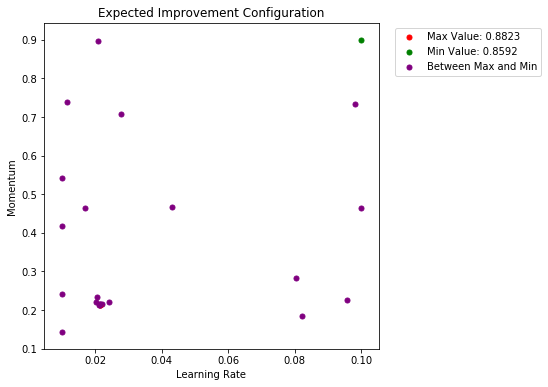

In [15]:
seen = list(seen)
plt.figure(figsize=(6,6))

for i in range(25):
    if max(seen) == seen[i]:
        max_value = plt.scatter(learning_b1[i], momentum_b1[i], color = 'r', s = 25)
    else:
        if min(seen) == seen[i]:
            min_value = plt.scatter(learning_b1[i], momentum_b1[i], color = 'g', s = 25)
        else:
            medium_value = plt.scatter(learning_b1[i], momentum_b1[i], color = 'purple', s = 25)

plt.legend((max_value, min_value, medium_value),
           ('Max Value: '+str(round(max(best_seen_b1), 4)), 'Min Value: '+str(round(min(best_seen_b1), 4)), 'Between Max and Min'),
           scatterpoints=1,
           loc='best',
           bbox_to_anchor=(1, 0.5, 0.5, 0.5),
           ncol=1,
           fontsize=10)

plt.title('Expected Improvement Configuration')
plt.xlabel('Learning Rate')
plt.ylabel('Momentum')
plt.show()

In [16]:
print("ProbabilityImprovement")
best_seen = list()
best_seen = list(best_seen_b2[0:5])
seen = list(seen[0:5])

for iter in range(20):
    print("ITERATION NUMBER: ", (iter+1))
    y2 = bo_two.GP.predict(pp,return_std=True)
    
    a2 = -bo_two._acqWrapper(pp)
    a2 = a2.reshape(len(xs),len(ys))

    bo_two._optimizeAcq(method='L-BFGS-B', n_start=100)
    
    bo_two.updateGP()

ProbabilityImprovement
ITERATION NUMBER:  1
TRY LEARNING RATE:   0.02063
TRY MOMENTUM:        0.21639
TRY FIRST NEURONS:       4
TRY SECOND NEURONS:      2
ACCURACY OBTAIN:     0.88141
PRECISION CLASS 0:   0.88141
RECALL CLASS 0:        1.0
PRECISION CLASS 1:     0.0
RECALL CLASS 1:        0.0

ITERATION NUMBER:  2
TRY LEARNING RATE:   0.01993
TRY MOMENTUM:        0.21971
TRY FIRST NEURONS:       4
TRY SECOND NEURONS:      2
ACCURACY OBTAIN:     0.88141
PRECISION CLASS 0:   0.88141
RECALL CLASS 0:        1.0
PRECISION CLASS 1:     0.0
RECALL CLASS 1:        0.0

ITERATION NUMBER:  3
TRY LEARNING RATE:   0.01949
TRY MOMENTUM:        0.22202
TRY FIRST NEURONS:       4
TRY SECOND NEURONS:      2
ACCURACY OBTAIN:     0.88141
PRECISION CLASS 0:   0.88141
RECALL CLASS 0:        1.0
PRECISION CLASS 1:     0.0
RECALL CLASS 1:        0.0

ITERATION NUMBER:  4
TRY LEARNING RATE:   0.01895
TRY MOMENTUM:        0.22449
TRY FIRST NEURONS:       4
TRY SECOND NEURONS:      2
ACCURACY OBTAIN:     0.88

In [17]:
best_seen_b2 = list(best_seen)
print("best seen Accuracy: ",max(best_seen_b2))
print(best_seen_b2)
print(len(best_seen_b2))

best seen Accuracy:  0.8914141414141415
[0.8591919191919191, 0.8714141414141414, 0.8714141414141414, 0.8714141414141414, 0.8714141414141414, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415, 0.8823232323232324, 0.8914141414141415, 0.8914141414141415, 0.8914141414141415, 0.8914141414141415, 0.8914141414141415]
25


In [18]:
learning_b2 = list(learning_rate_done)
momentum_b2 = list(momentum_done)
print(learning_b2)
print(momentum_b2)

[0.020818869080358196, 0.08027501032730866, 0.0957495344032141, 0.09811853811624326, 0.08212694362596505, 0.020627180642702993, 0.019931829146546228, 0.01948651256706034, 0.018945579865292068, 0.01831810596233339, 0.017604445208823895, 0.016793742751778976, 0.015923709721007862, 0.020557251148987245, 0.02065738555685046, 0.020776217470334004, 0.019423659631893738, 0.01916976309565768, 0.018811551802291566, 0.013386890438104893, 0.010309149041359293, 0.014772524599240767, 0.044383438897147263, 0.013229333276252288, 0.0385197969898416]
[0.8962135439674396, 0.281643562688499, 0.22643775525026016, 0.7344921205928431, 0.18465771223311825, 0.21639433087558882, 0.21971375717171807, 0.22201765092771844, 0.22449263347813947, 0.2271337992651721, 0.2298838529434364, 0.2324826829609898, 0.23528351337417355, 0.21887648928570003, 0.21879987519783756, 0.21863805252354668, 0.22124879865570266, 0.22234314462740748, 0.22382807052038992, 0.6743028871833853, 0.6798589704781193, 0.6566723397251797, 0.10083

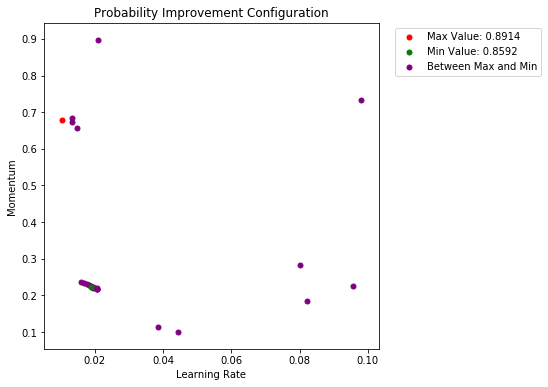

In [19]:
seen = list(seen)
plt.figure(figsize=(6,6))

for i in range(25):
    if max(seen) == seen[i]:
        max_value = plt.scatter(learning_b2[i], momentum_b2[i], color = 'r', s = 25)
    else:
        if min(seen) == seen[i]:
            min_value = plt.scatter(learning_b2[i], momentum_b2[i], color = 'g', s = 25)
        else:
            medium_value = plt.scatter(learning_b2[i], momentum_b2[i], color = 'purple', s = 25)

plt.legend((max_value, min_value, medium_value),
           ('Max Value: '+str(round(max(best_seen_b2), 4)), 'Min Value: '+str(round(min(best_seen_b2), 4)), 'Between Max and Min'),
           scatterpoints=1,
           loc='best',
           bbox_to_anchor=(1, 0.5, 0.5, 0.5),
           ncol=1,
           fontsize=10)

plt.title('Probability Improvement Configuration')
plt.xlabel('Learning Rate')
plt.ylabel('Momentum')
plt.show()

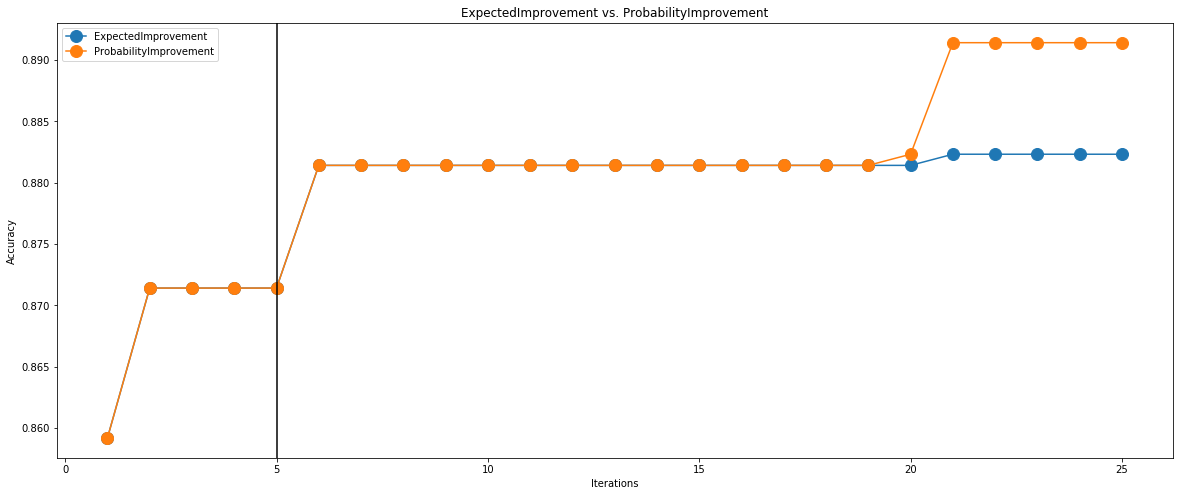

In [20]:
plt.figure(figsize=(20,8))
turn = list()
for i in range(25):
    turn.append(i+1) 
plt.plot(turn, best_seen_b1, 'o-', markersize=12, label='ExpectedImprovement')
plt.plot(turn, best_seen_b2, 'o-', markersize=12, label='ProbabilityImprovement')
plt.axvline(x=5, color = 'black')
plt.title('ExpectedImprovement vs. ProbabilityImprovement')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

### Grid Search sklearn

In [21]:
learning_rate = np.linspace(xrange[0],xrange[1],5)
momentum = np.linspace(yrange[0],yrange[1],5)

lr_use = list()
mom_use = list()

res = [0 for n in range(25)]
count = 0
for lr in learning_rate:
    for m in momentum:
        lr_use.append(lr)
        mom_use.append(m)
        res[count] = compute_accuracy_neural_network_sklearn(lr, m)
        count = count+1

TRY LEARNING RATE:    0.01
TRY MOMENTUM:          0.1
TRY FIRST NEURONS:       4
TRY SECOND NEURONS:      2
ACCURACY OBTAIN:     0.88141
PRECISION CLASS 0:   0.88141
RECALL CLASS 0:        1.0
PRECISION CLASS 1:     0.0
RECALL CLASS 1:        0.0

TRY LEARNING RATE:    0.01
TRY MOMENTUM:          0.3
TRY FIRST NEURONS:       4
TRY SECOND NEURONS:      2
ACCURACY OBTAIN:     0.88141
PRECISION CLASS 0:   0.88141
RECALL CLASS 0:        1.0
PRECISION CLASS 1:     0.0
RECALL CLASS 1:        0.0

TRY LEARNING RATE:    0.01
TRY MOMENTUM:          0.5
TRY FIRST NEURONS:       4
TRY SECOND NEURONS:      2
ACCURACY OBTAIN:     0.88141
PRECISION CLASS 0:   0.88141
RECALL CLASS 0:        1.0
PRECISION CLASS 1:     0.0
RECALL CLASS 1:        0.0

TRY LEARNING RATE:    0.01
TRY MOMENTUM:          0.7
TRY FIRST NEURONS:       4
TRY SECOND NEURONS:      2
ACCURACY OBTAIN:     0.88141
PRECISION CLASS 0:   0.88141
RECALL CLASS 0:        1.0
PRECISION CLASS 1:     0.0
RECALL CLASS 1:        0.0

TRY LEAR

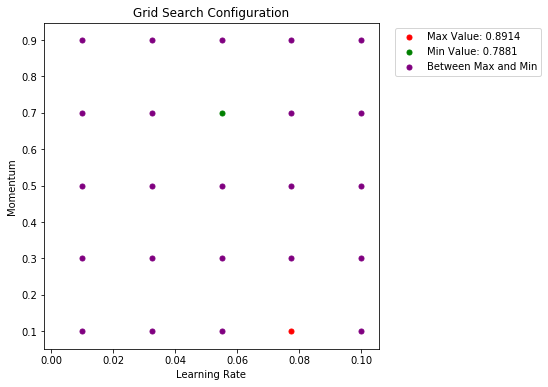

In [22]:
plt.figure(figsize=(6,6))

for i in range(25):
    if max(res) == res[i]:
        max_value = plt.scatter(lr_use[i], mom_use[i], color = 'r', s = 25)
    else:
        if min(res) == res[i]:
            min_value = plt.scatter(lr_use[i], mom_use[i], color = 'g', s = 25)
        else:
            medium_value = plt.scatter(lr_use[i], mom_use[i], color = 'purple', s = 25)

plt.legend((max_value, min_value, medium_value),
           ('Max Value: '+str(round(max(res), 4)), 'Min Value: '+str(round(min(res), 4)), 'Between Max and Min'),
           scatterpoints=1,
           loc='best',
           bbox_to_anchor=(1, 0.5, 0.5, 0.5),
           ncol=1,
           fontsize=10)

plt.title('Grid Search Configuration')
plt.xlabel('Learning Rate')
plt.ylabel('Momentum')
plt.show()

Best on the grid:0.89%%


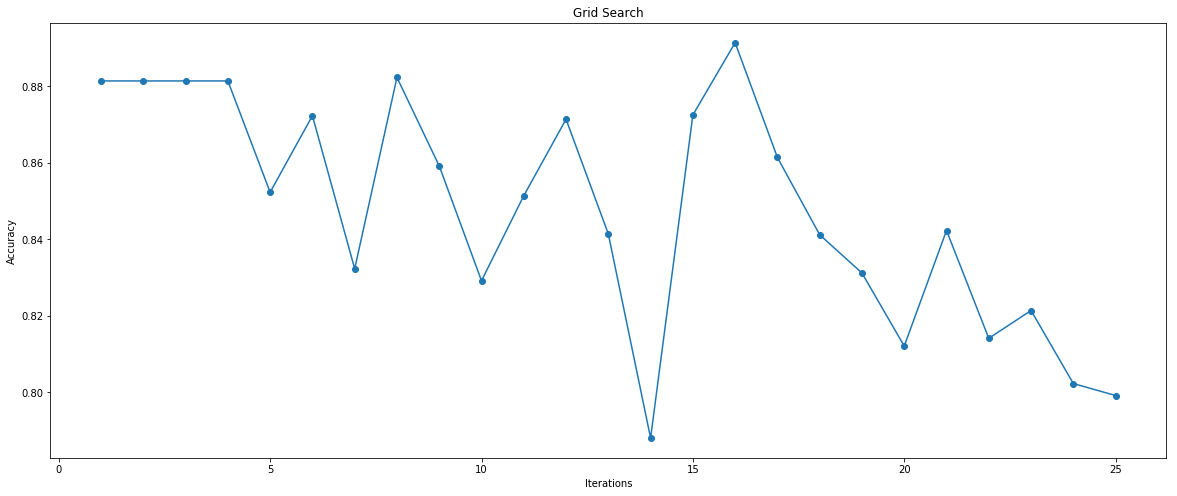

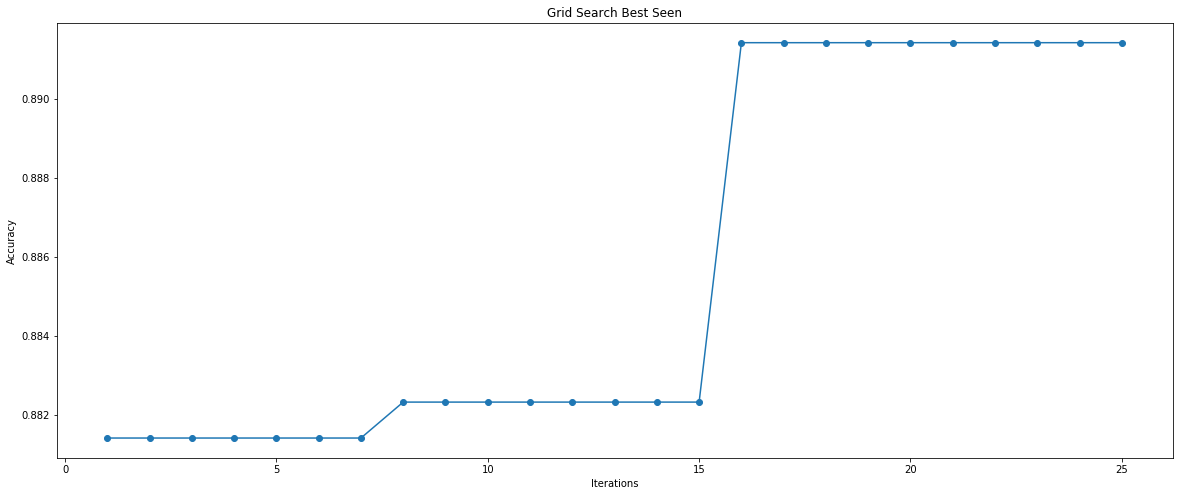

In [23]:
plt.figure(figsize=(20,8))
plt.title('Grid Search')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.plot(turn, res, marker="o")
print("Best on the grid:"+str(round(max(np.asarray(res)),2))+"%%")

grid_best_seen = list()
grid_best_seen.append(res[0])
for i in range(1, len(res)):
    if res[i] > max(grid_best_seen):
        grid_best_seen.append(res[i])
    else:
        grid_best_seen.append(grid_best_seen[-1])

plt.figure(figsize=(20,8))
plt.title('Grid Search Best Seen')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.plot(turn, grid_best_seen, marker="o")

### Random Search sklearn

In [30]:
lr_used = list()
momentum_used = list()
res_random = [0 for n in range(25)]

lr = 0.0
m = 0.0

for cont in range(0, 25):
    
    lr = random.uniform(0.01,0.1)
    m = random.uniform(0.1, 0.9)
    
    while lr in lr_used:
        lr = random.uniform(0.01,0.1)
    
    while lr in momentum_used:
        m = random.uniform(0.1, 0.9)
    
    res_random[cont] = compute_accuracy_neural_network_sklearn(lr, m)
    
    lr_used.append(lr)
    momentum_used.append(m)

TRY LEARNING RATE:   0.04776
TRY MOMENTUM:        0.468
TRY FIRST NEURONS:       4
TRY SECOND NEURONS:      2
ACCURACY OBTAIN:     0.87141
PRECISION CLASS 0:   0.8803
RECALL CLASS 0:      0.98889
PRECISION CLASS 1:     0.0
RECALL CLASS 1:        0.0

TRY LEARNING RATE:   0.0941
TRY MOMENTUM:        0.59104
TRY FIRST NEURONS:       4
TRY SECOND NEURONS:      2
ACCURACY OBTAIN:     0.81919
PRECISION CLASS 0:   0.90919
RECALL CLASS 0:      0.89583
PRECISION CLASS 1:   0.10833
RECALL CLASS 1:        0.3

TRY LEARNING RATE:   0.09333
TRY MOMENTUM:        0.40438
TRY FIRST NEURONS:       4
TRY SECOND NEURONS:      2
ACCURACY OBTAIN:     0.8201
PRECISION CLASS 0:   0.8842
RECALL CLASS 0:      0.91944
PRECISION CLASS 1:   0.03333
RECALL CLASS 1:        0.1

TRY LEARNING RATE:   0.08871
TRY MOMENTUM:        0.31238
TRY FIRST NEURONS:       4
TRY SECOND NEURONS:      2
ACCURACY OBTAIN:     0.82121
PRECISION CLASS 0:   0.8817
RECALL CLASS 0:      0.92083
PRECISION CLASS 1:     0.1
RECALL CLASS 1:

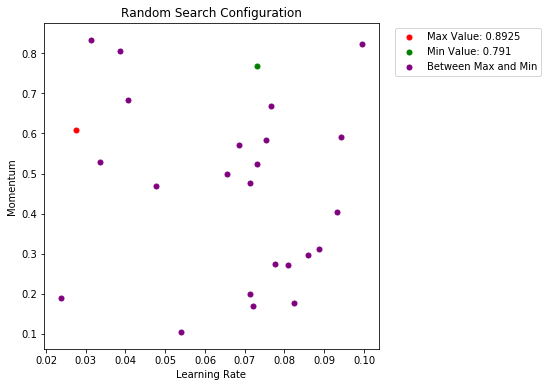

In [31]:
plt.figure(figsize=(6,6))

for i in range(25):
    if max(res_random) == res_random[i]:
        max_value = plt.scatter(lr_used[i], momentum_used[i], color = 'r', s = 25)
    else:
        if min(res_random) == res_random[i]:
            min_value = plt.scatter(lr_used[i], momentum_used[i], color = 'g', s = 25)
        else:
            medium_value = plt.scatter(lr_used[i], momentum_used[i], color = 'purple', s = 25)

plt.legend((max_value, min_value, medium_value),
           ('Max Value: '+str(round(max(res_random), 4)), 'Min Value: '+str(round(min(res_random), 4)), 'Between Max and Min'),
           scatterpoints=1,
           loc='best',
           bbox_to_anchor=(1, 0.5, 0.5, 0.5),
           ncol=1,
           fontsize=10)

plt.title('Random Search Configuration')
plt.xlabel('Learning Rate')
plt.ylabel('Momentum')
plt.show()

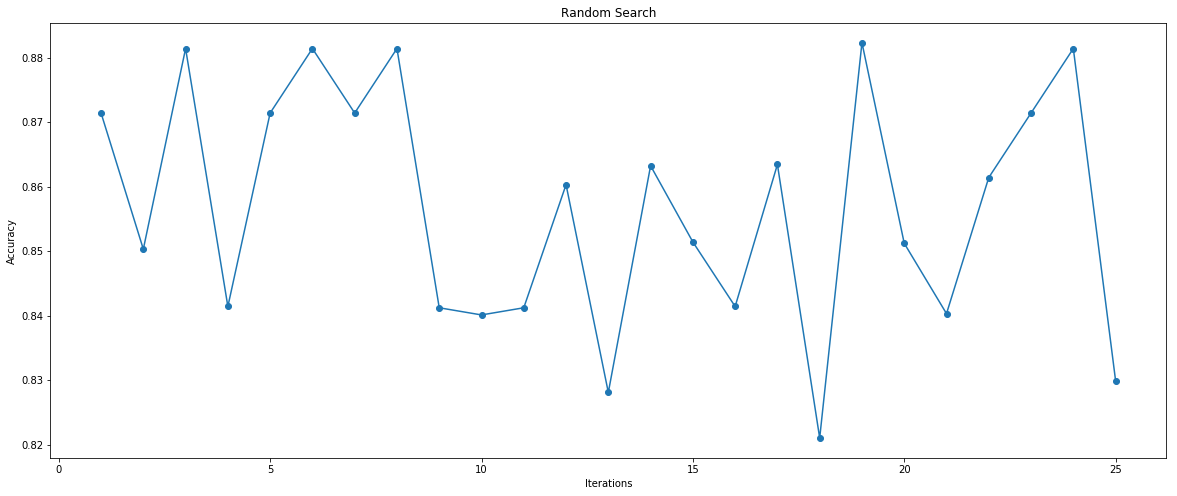

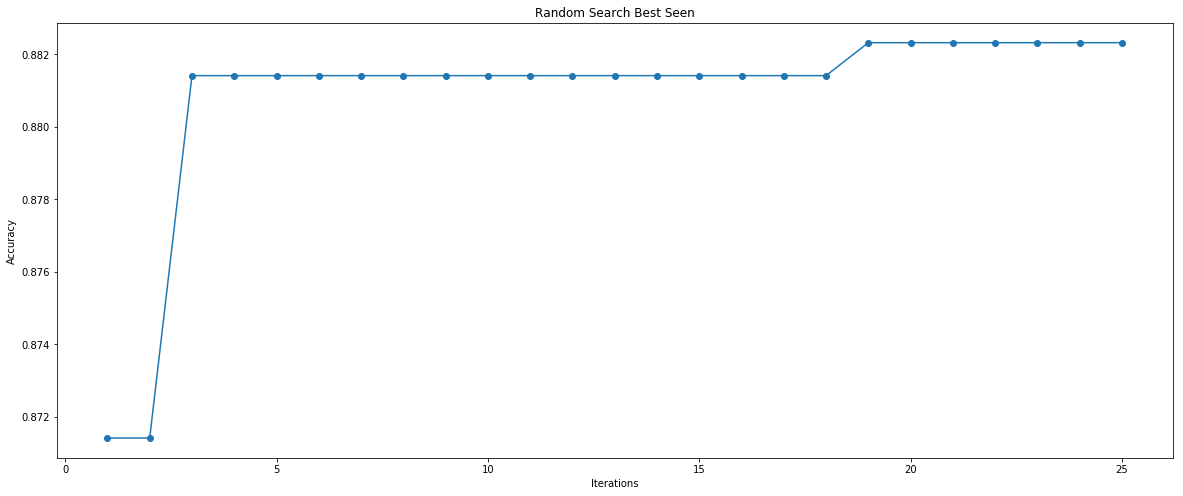

In [29]:
plt.figure(figsize=(20,8))
plt.title('Random Search')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.plot(turn, res_random, marker="o")

random_best_seen = list()
random_best_seen.append(res_random[0])
for i in range(1, len(res_random)):
    if res_random[i] > max(random_best_seen):
        random_best_seen.append(res_random[i])
    else:
        random_best_seen.append(random_best_seen[-1])
        
plt.figure(figsize=(20,8))
plt.title('Random Search Best Seen')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.plot(turn, random_best_seen, marker="o")

In [32]:
random_best_seen = list()
random_best_seen.append(res_random[0])
for i in range(1, len(res_random)):
    if res_random[i] > max(random_best_seen):
        random_best_seen.append(res_random[i])
    else:
        random_best_seen.append(random_best_seen[-1])
        
print(random_best_seen)

[0.8714141414141414, 0.8714141414141414, 0.8714141414141414, 0.8714141414141414, 0.8714141414141414, 0.8723232323232324, 0.8723232323232324, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415, 0.8814141414141415, 0.8925252525252526, 0.8925252525252526, 0.8925252525252526, 0.8925252525252526, 0.8925252525252526, 0.8925252525252526, 0.8925252525252526, 0.8925252525252526]


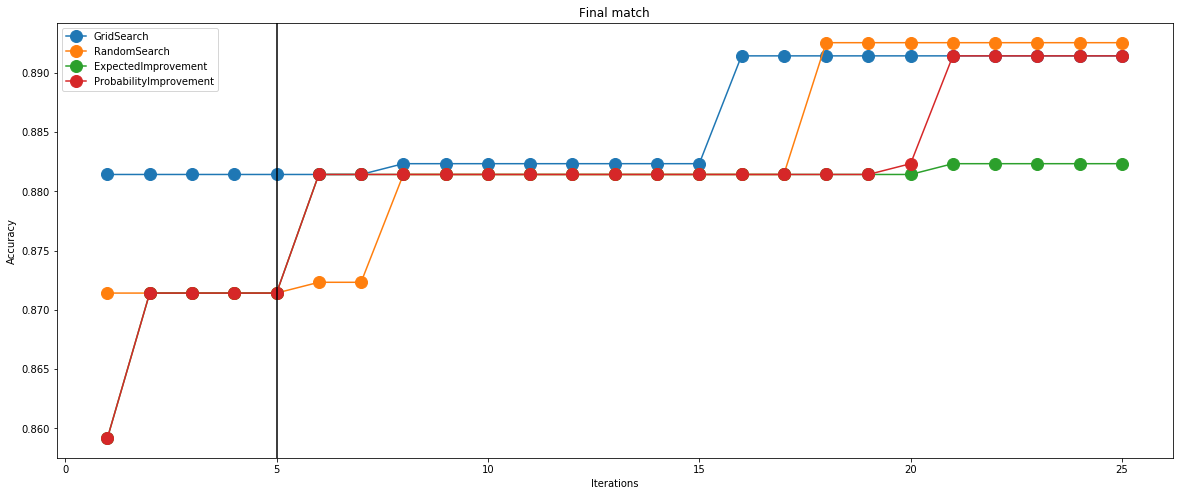

In [33]:
plt.figure(figsize=(20,8))
turn = list()
for i in range(25):
    turn.append(i+1)

plt.plot(turn, grid_best_seen, 'o-', markersize=12, label='GridSearch')
plt.plot(turn, random_best_seen, 'o-', markersize=12, label='RandomSearch')
plt.plot(turn, best_seen_b1, 'o-', markersize=12, label='ExpectedImprovement')
plt.plot(turn, best_seen_b2, 'o-', markersize=12, label='ProbabilityImprovement')
plt.axvline(x=5, color = 'black')

plt.title('Final match')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

# Step 2

In [ ]:
best_seen = list()
initialPoints = 10
iterations = 100
param = {'learning_rate': ('cont', [0.01,0.1]), 'momentum': ('cont', [0.1, 0.9]), 'first_layer': ('int', [1, 4]),
        'second_layer': ('int', [1, 2])}
sur_model = RandomForest()

In [ ]:
acq_one = Acquisition(mode="ExpectedImprovement")
acq_two = Acquisition(mode="ProbabilityImprovement")


In [ ]:
bo_one = GPGO(sur_model, acq_one, compute_accuracy_neural_network_sklearn, param, n_jobs=1)
bo_one._firstRun(initialPoints)

In [ ]:
print(best_seen)
best_seen_b2 = list(best_seen)
print(best_seen_b2)

In [ ]:
bo_two = GPGO(sur_model, acq_two, compute_accuracy_neural_network_sklearn, param, n_jobs=1)
bo_two.X = bo_one.X
bo_two.y = bo_one.y
bo_two.GP.fit(bo_two.X, bo_two.y)
bo_two.tau = np.max(bo_two.y)
bo_two.history.append(bo_two.tau)

In [ ]:
print(bo_one.X)
print(bo_two.X)
print("---------")
print(bo_one.y)
print(bo_two.y)

In [ ]:
xrange = list(param.values())[0][1]
yrange = list(param.values())[1][1]
zrange = list(param.values())[2][1]
krange = list(param.values())[2][1]
xs, ys = np.linspace(xrange[0], xrange[1], 50).reshape((50, 1)), np.linspace(yrange[0],
                                                                             yrange[1], 50).reshape((50, 1))
zs, ks = np.linspace(zrange[0], zrange[1], 50).reshape((50, 1)), np.linspace(krange[0],
                                                                             krange[1], 50).reshape((50, 1))

print(len(xs))
print(len(zs))

pp = []

for i in range(len(xs)*len(ys)*len(zs)*len(ks)):
    pp.append(list([0]*4))

for i in range(0, len(zs)):
    zs[i] = int(zs[i])
    ks[i] = int(ks[i])
    
cont = 0

for i in range(len(xs)):
    for j in range(len(ys)):
        for z in range(len(zs)):
            for k in range(len(ks)):
                pp[cont] = list([xs[i][0], ys[j][0], int(zs[z][0]), int(ks[k][0])])
                cont += 1
pp = np.asarray(pp).reshape(len(xs)*len(ys)*len(zs)*len(ks),4)

In [ ]:
print(pp[0:2500])

In [ ]:
real_pp = list()
for i in range((len(xs)*len(ys)*len(zs)*len(ks))):
    real_pp.append(list(pp[i]))
real_pp = np.asarray(real_pp).reshape((len(xs)*len(ys)*len(zs)*len(ks)),4)

In [ ]:
print("ExpectedImprovement")

for iter in range(iterations):
    print("ITERATION NUMBER: ", (iter+1))
    y1 = bo_one.GP.predict(real_pp,return_std=True)

    a1 = -bo_one._acqWrapper(real_pp)
    
    bo_one._optimizeAcq(method='L-BFGS-B', n_start=100)
    
    bo_one.updateGP()

In [ ]:
best_seen_b1 = list(best_seen)
print("best seen Accuracy: ",max(best_seen_b1))
print(best_seen_b1)
print(len(best_seen_b1))

In [ ]:
best_seen = list()
best_seen = list(best_seen_b2[0:10])
for iter in range(iterations):
    print("ITERATION NUMBER: ", (iter+1))
    y2 = bo_two.GP.predict(pp,return_std=True)
    
    a2 = -bo_two._acqWrapper(pp)
    a2 = a2.reshape(len(xs),len(ys), len(zs), len(ks))

    bo_two._optimizeAcq(method='L-BFGS-B', n_start=100)
    
    bo_two.updateGP()

In [ ]:
best_seen_b2 = list(best_seen)
print("best seen Accuracy: ",max(best_seen_b2))
print(best_seen_b2)
print(len(best_seen_b2))

In [ ]:
plt.figure(figsize=(30,10))
turn = list()
for i in range(110):
    turn.append(i+1)
plt.plot(turn, best_seen_b1, 'o-', markersize=12, label='ExpectedImprovement')
plt.plot(turn, best_seen_b2, 'o-', markersize=12, label='ProbabilityImprovement')
plt.axvline(x=10, color = 'black')
plt.title('ExpectedImprovement vs. ProbabilityImprovement')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()